In [263]:
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np

6000


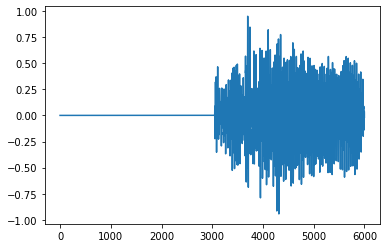

In [275]:
import sounddevice as sd

fs = 6000
seconds = 1
sampled_voice = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()
scipy.io.wavfile.write("output_recording.wav", fs, sampled_voice)
plt.plot(sampled_voice)
print(len(sampled_voice))

In [276]:
import cmath
def DTFT(list):
    ans = []
    omega = np.linspace(-cmath.pi,cmath.pi,len(list))
    for i in range(len(omega)):
        temp = 0
        for k in range(len(list)):
            temp+= list[k]*cmath.exp(-1j*k*omega[i])
        ans.append(temp)
    return [omega, ans]

In [277]:
sampled_voice_dtft = DTFT(sampled_voice)

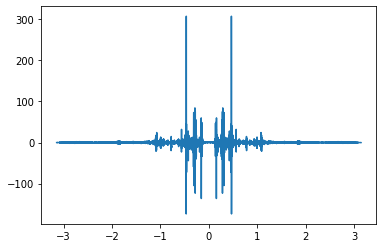

In [278]:
omega_sampled_voice = sampled_voice_dtft[0]
dtft_sampled_voice = sampled_voice_dtft[1]
plt.plot(omega_sampled_voice,dtft_sampled_voice)

In [280]:
def inverse_DTFT(list):
    ans = []
    time = np.linspace(0,len(list),len(list))
    omega = np.linspace(-cmath.pi,cmath.pi,len(list))
    for i in range(len(list)):
        temp = 0
        for k in range(len(list)):
            temp+= list[k]*cmath.exp(1j*time[i]*omega[k])
        ans.append(temp)
    return [omega,time,ans]

In [281]:
sampled_voice_idtft = inverse_DTFT(dtft_sampled_voice)

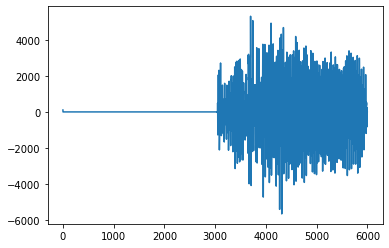

In [284]:
idtft_sampled_voice = sampled_voice_idtft[2]
time_sampled_voice = sampled_voice_idtft[1]
plt.plot(np.real(idtft_sampled_voice))
scipy.io.wavfile.write("output_inv.wav",6000,np.real(idtft_sampled_voice))

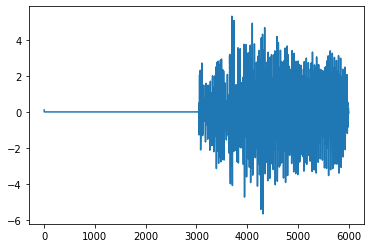

In [294]:
x = list(idtft_sampled_voice)
for idx in range(len(x)):
    x[idx]*= 1000000
plt.plot(x)

In [296]:
scipy.io.wavfile.write("output_inv.wav",6000,np.real(x))

In [304]:
def calculate_bandwidth(list, threshold):
    ans = 0
    for i in range(len(list)):
        if list[i] > threshold:
           ans = i 
    return ans
    

In [310]:
bandwidth = omega_sampled_voice[calculate_bandwidth(dtft_sampled_voice,0.1)]
print(bandwidth)

3.131118932457638


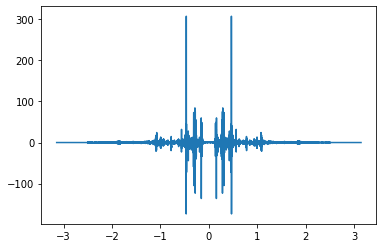

In [312]:
dtft_bw = list(dtft_sampled_voice)
omega_bw = list(omega_sampled_voice)
for i in range(len(omega_bw)):
    if(omega_bw[i] > 0 and omega_bw[i] > 0.8*bandwidth):
        dtft_bw[i] = np.asarray([0], dtype = 'complex64')
    elif(omega_bw[i] < 0 and omega_bw[i]<-0.8*bandwidth):
        dtft_bw[i] = np.asarray([0], dtype = 'complex64')
        
plt.plot(omega_bw,dtft_bw)

In [313]:
idtft_bw = inverse_DFT(dtft_bw)

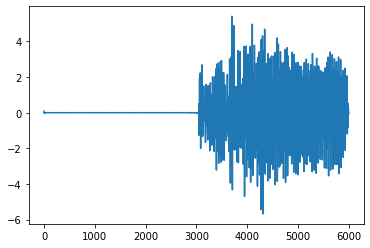

In [323]:
plt.plot(idtft_bw[2])

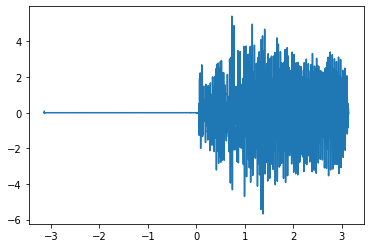

In [319]:
x = list(idtft_bw[2])
for idx in range(len(x)):
    x[idx]*=10
plt.plot(omega_bw,x)


In [324]:
scipy.io.wavfile.write("output_inv_bw.wav",6000,np.real(x))

In [326]:
idtft_abs_sampled_voice = inverse_DFT(np.abs(dtft_sampled_voice))

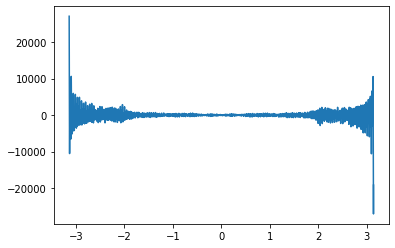

In [328]:
plt.plot(idtft_abs_sampled_voice[0],idtft_abs_sampled_voice[2])

In [330]:
x = list(idtft_abs_sampled_voice[2])
for idx in range(len(x)):
    x[idx]/=1000


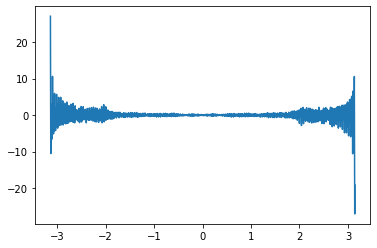

In [331]:
plt.plot(idtft_abs_sampled_voice[0],idtft_abs_sampled_voice[2])

In [333]:
scipy.io.wavfile.write("output_inv_abs.wav",6000,np.real(idtft_abs_sampled_voice[2]))